# Projeto: Ligações para o 911

Para este projeto estaremos analisando alguns dados de chamadas para o 911 do [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)

Simplesmente acompanhe este notebook e tente completar as instruções ou responder as perguntas em negrito usando suas habilidades Python e Data Science!

## Dados e Configuração

** Importar numpy e pandas **

In [1]:
import numpy as np
import pandas as pd

** Importe as bibliotecas de visualização e configure% matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

** Leia o arquivo csv como um dataframe chamado df **

In [3]:
df = pd.read_csv('911.csv')

** Verifique a info() do df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628737 entries, 0 to 628736
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        628737 non-null  float64
 1   lng        628737 non-null  float64
 2   desc       628737 non-null  object 
 3   zip        552155 non-null  float64
 4   title      628737 non-null  object 
 5   timeStamp  628737 non-null  object 
 6   twp        628468 non-null  object 
 7   addr       628737 non-null  object 
 8   e          628737 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 43.2+ MB


** Verifique o cabeçalho do df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Perguntas básicas

** Quais são os top 5 CEPs nas chamadas 911? **

In [6]:
df['zip'].value_counts().head()


19401.0    42861
19464.0    41386
19403.0    32931
19446.0    30510
19406.0    21345
Name: zip, dtype: int64

** Quais são os 5 principais municípios nas chamadas 911? **

In [7]:
df['twp'].value_counts().head()

LOWER MERION    52896
ABINGTON        37887
NORRISTOWN      35311
UPPER MERION    34363
CHELTENHAM      28997
Name: twp, dtype: int64

** Dê uma olhada na coluna 'title'. Quantos códigos de título exclusivos existem? **

In [8]:
df['title'].nunique()

147

## Criando novos recursos

** Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS", "Fire" e "Traffic". Use .apply () com uma expressão lambda personalizada para criar uma nova coluna chamada "Razão" que contém esse valor de string. **

** Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS. **

In [9]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

** Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna? **

In [10]:
df['Reason'].value_counts().head(1)

EMS    313625
Name: Reason, dtype: int64

** Agora use Seaborn para criar um countplot de chamadas 911 baseadas nesta nova coluna. **

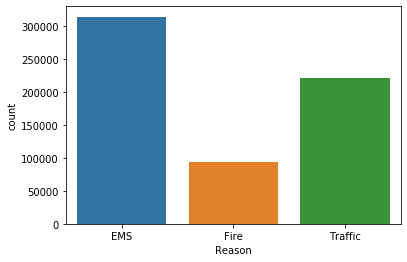

In [11]:
sns.countplot(df['Reason'])

** Agora vamos começar a focar em informações de tempo. Qual é o tipo de dados dos objetos na coluna timeStamp? **

In [12]:
type(df['timeStamp'].iloc[0])

str

** Você deveria ter notado que esses timestamps ainda são strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para converter a coluna de strings em objetos DateTime. **

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Agora você pode pegar atributos específicos de um objeto Datetime chamando-os. Por exemplo:**

    time = df['timeStamp'].iloc[0]
    time.hour

** Você pode usar o método de consulta de funções do Jupyter (Tab) para explorar os vários atributos que você pode chamar. Agora que a coluna timestamp é realmente objetos DateTime, use .apply () para criar 3 novas colunas chamadas Hour, Month e Day of Week. Você criará essas colunas com base na coluna timeStamp, consulte as soluções se você ficar preso nesta etapa. **

In [14]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

** Observe como o dia da demana é um número inteiro de 0-6. Use o .map () com este dicionário para mapear os nomes das seqüências reais para o dia da semana: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
df['Day of Week'] = df['Day of Week'].map(lambda x: dmap[x])

** Agora use Seaborn para criar um countplot da coluna "Day of Week" com a tonalidade baseada na coluna Reason. **

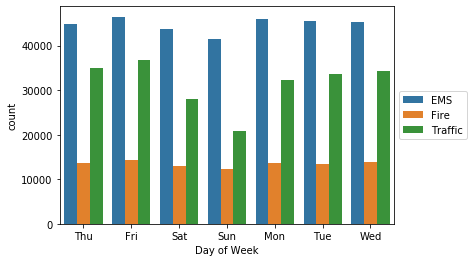

In [17]:
plot = sns.countplot(x=df['Day of Week'], hue=df['Reason'])
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

** Agora faça o mesmo para o mês: **

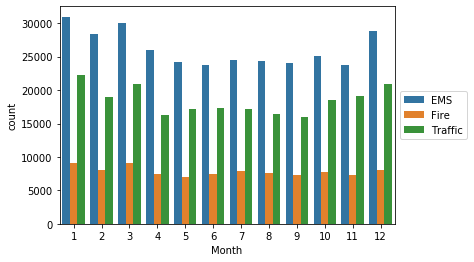

In [18]:
plot = sns.countplot(x=df['Month'], hue=df['Reason'])
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

** Você notou algo estranho no Plot? **

_____

** Você deve ter notado que estavam faltando alguns meses. Vejamos se podemos talvez preencher essa informação ao traçar as informações de outra forma, possivelmente um plot de linha simples que preencha os meses que faltam. Para fazer isso, precisamos trabalhar com pandas...

** Agora, crie um objeto groupby chamado "byMonth", onde você agrupa o DataFrame pela coluna do mês e use o método count() para agregação. Use o método head() neste DataFrame retornado. **

In [19]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,49730,49730,49730,43750,49730,49730,49716,49730,49730,49730,49730,49730
5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467


** Agora crie um plot simples fora do Dataframe indicando a contagem de chamadas por mês. **

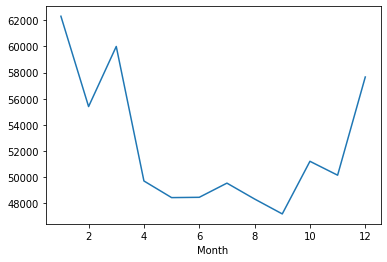

In [20]:
byMonth['twp'].plot()

** Agora veja se você pode usar o lmplot () do Seaborn para criar um modelo linear no número de chamadas por mês. Tenha em mente que talvez seja necessário resetar o índice em uma coluna. **

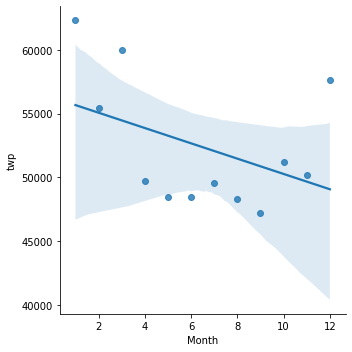

In [21]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

** Crie uma nova coluna chamada 'Data' que contenha a data da coluna timeStamp. Você precisará usar .apply() junto com o método .date(). **

In [22]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

** Agora agrupe esta coluna Data com o groupby. Usando o count (), crie um gráfico de contagens de chamadas 911. **

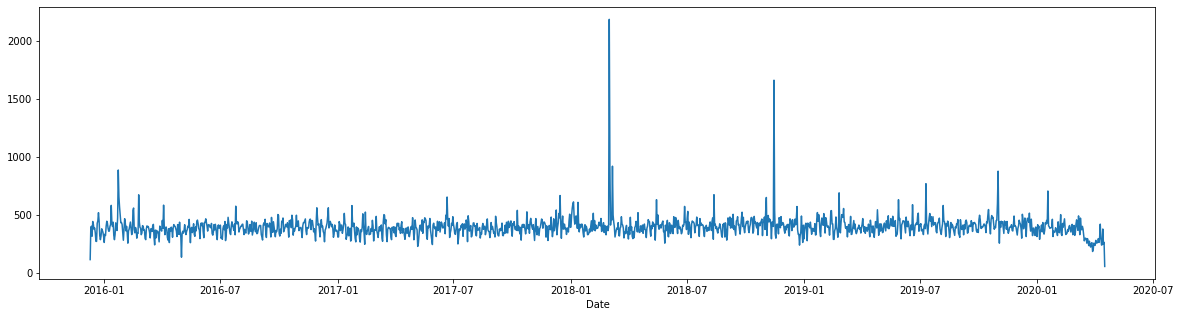

In [23]:
byDate = df.groupby('Date').count()
byDate['twp'].plot(figsize=(20,5))

** Agora recrie esse plot, mas crie 3 plots separados com cada plot representando uma Razão para a chamada 911 **

Text(0.5, 1.0, 'Traffic')

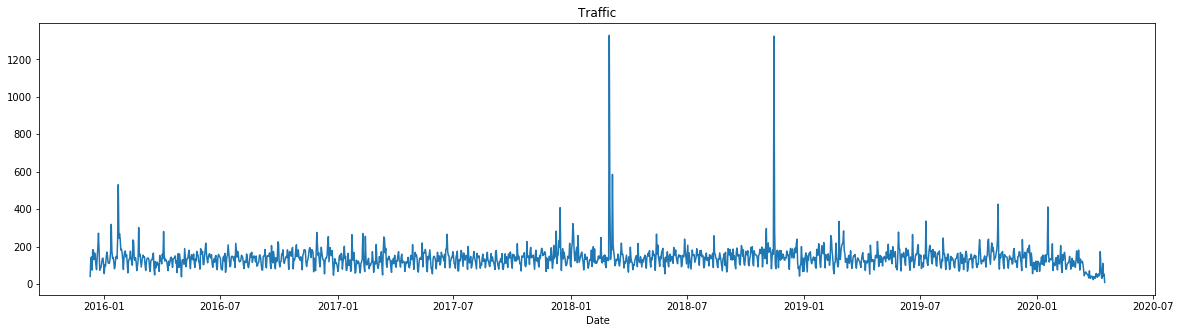

In [24]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot(figsize=(20,5))
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

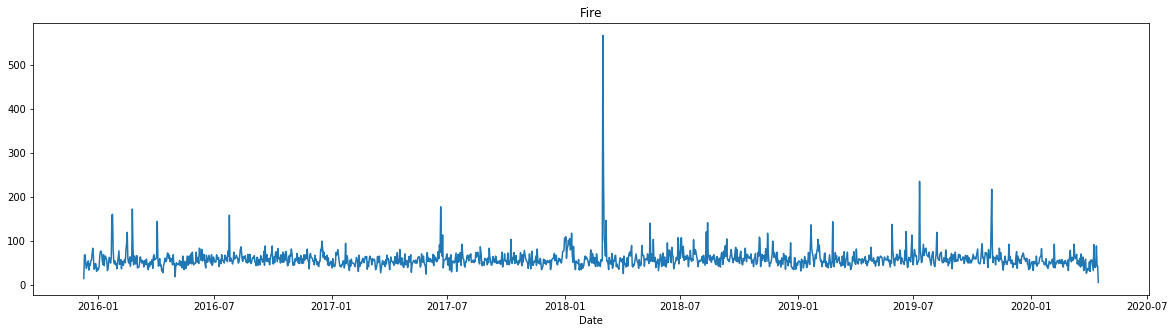

In [25]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot(figsize=(20,5))
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

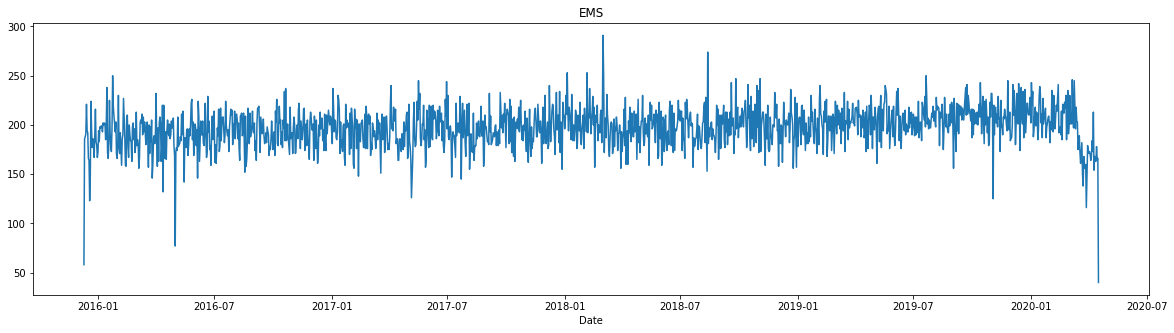

In [26]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot(figsize=(20,5))
plt.title('EMS')

____
** Agora vamos continuar a criar mapas de calor com seaborn e nossos dados. Em primeiro lugar, devemos reestruturar o quadro de dados para que as colunas se tornem horas e o Índice se torne o Dia da Semana. Há muitas maneiras de fazer isso, mas eu recomendaria tentar combinar groupby com o método [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) . Consulte as soluções se você ficar preso nisso! **

In [27]:
days = df.groupby(['Day of Week','Hour'])['Reason'].count().unstack()
days

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1861,1528,1362,1237,1237,1551,2554,3976,4812,5007,...,6049,6667,6734,6795,5374,4780,4124,3677,3234,2703
Mon,1775,1469,1290,1203,1269,1741,2571,4270,5314,5470,...,5365,5866,6028,6122,5174,4247,3576,3065,2506,1957
Sat,2305,1950,1802,1507,1367,1485,1782,2381,3291,4109,...,5134,4908,4922,4938,4740,4512,3924,3690,3044,2807
Sun,2307,2042,1842,1522,1394,1393,1649,2280,2861,3540,...,4469,4232,4293,4273,4163,3944,3532,2965,2465,2194
Thu,1624,1318,1340,1167,1199,1678,2692,4286,5115,5119,...,5752,6145,6044,6632,5237,4439,3871,3303,2688,2226
Tue,1615,1370,1261,1150,1180,1660,2669,4238,5402,5322,...,5593,5957,6185,6601,5371,4353,3647,3233,2555,2007
Wed,1571,1398,1198,1197,1052,1518,2546,4488,5274,5198,...,5657,6145,6424,6702,5381,4454,3889,3329,2653,2090


** Agora crie um mapa de calor usando este DataFrame **

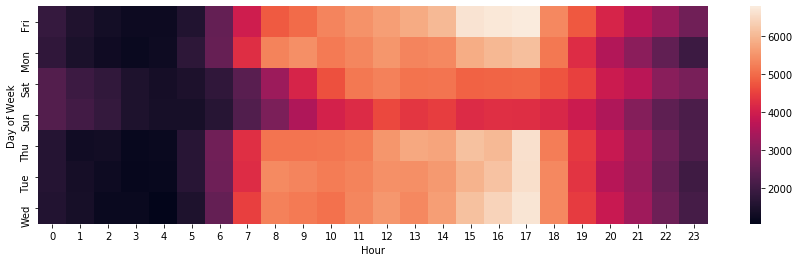

In [28]:
plt.figure(figsize=(15, 4))
sns.heatmap(days)

** Agora crie um clustermap usando este DataFrame. **

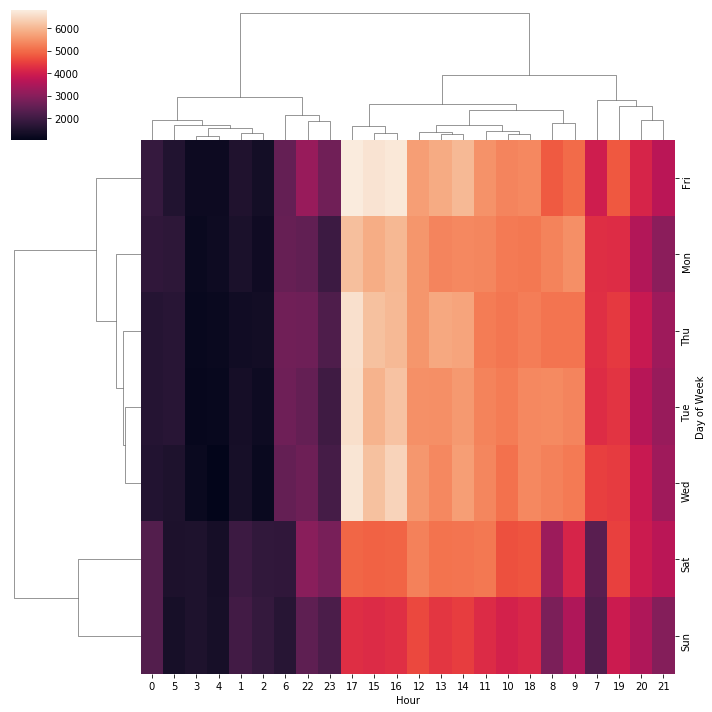

In [29]:
sns.clustermap(days)

** Agora repita estes mesmos plots e operações para um DataFrame que mostra o mês como a coluna. **

In [30]:
month = df.groupby(['Day of Week','Month'])['Reason'].count().unstack()
month

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7479,7214,7647,7103,7336,7694,6934,8379,9305
Mon,8896,8747,8060,7843,6746,6740,7929,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7027,5796,6839,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6417,5410,5673,6567,5275,5956,6316,5196,7165
Thu,9055,7997,8849,6902,7524,7850,6964,7508,6954,7482,8358,8151
Tue,9714,8087,8372,6998,7835,6689,7637,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7064,7942,7055,6976,7984,6844,7876,7410,7682


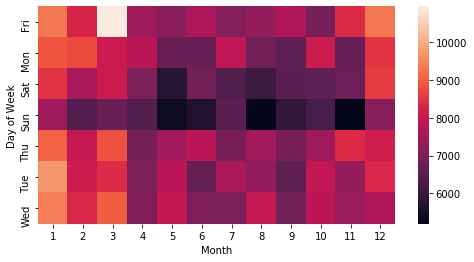

In [31]:
plt.figure(figsize=(8, 4))
sns.heatmap(month)

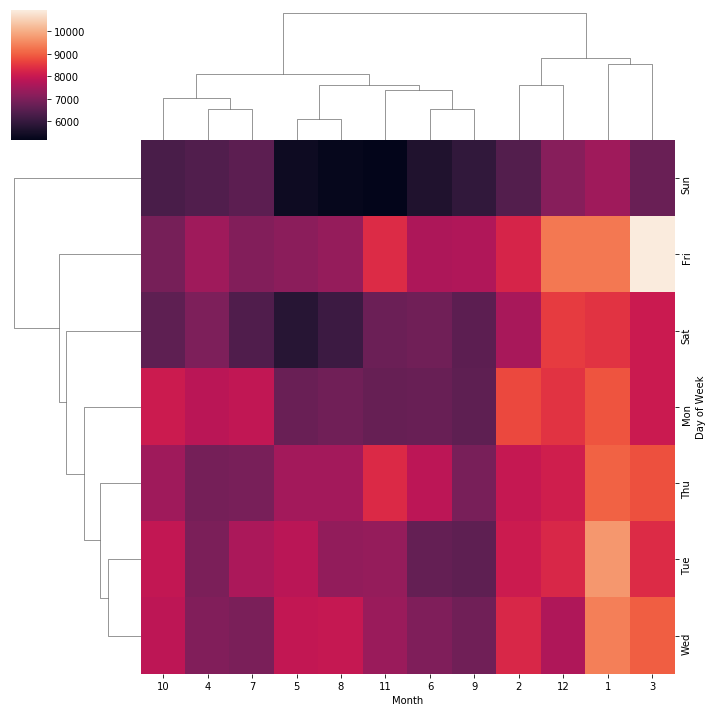

In [32]:
sns.clustermap(month)